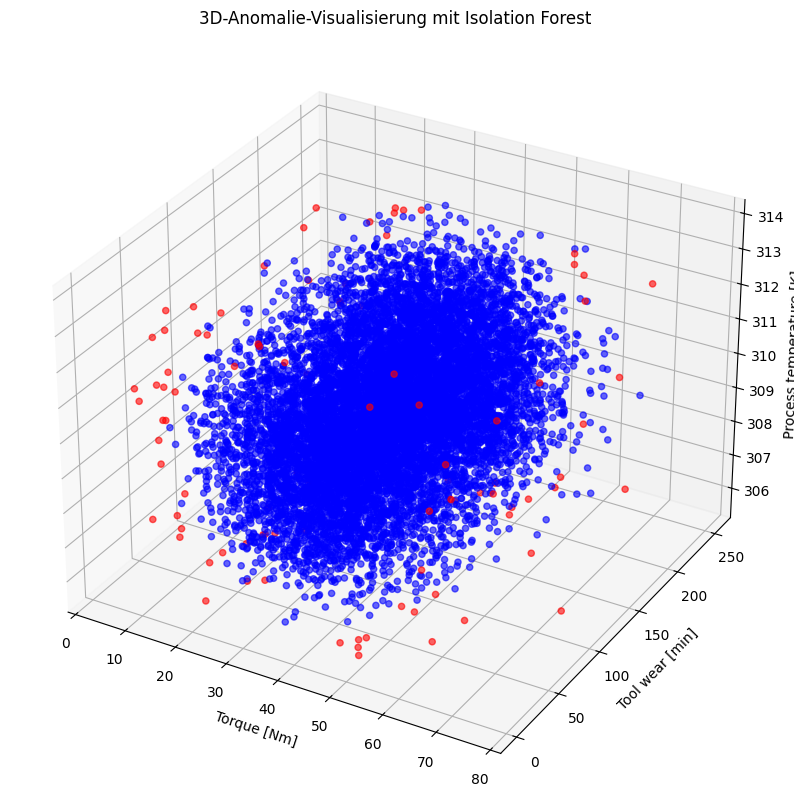

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from mpl_toolkits.mplot3d import Axes3D

# Daten laden
df = pd.read_csv('../data/ai4i2020.csv')

# Features für 3D
features = ['Torque [Nm]', 'Tool wear [min]', 'Process temperature [K]']
X = df[features]

# Isolation Forest Modell
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(X)

# 3D-Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = df['anomaly'].map({1: 'blue', -1: 'red'})

ax.scatter(df['Torque [Nm]'], df['Tool wear [min]'], df['Process temperature [K]'],
           c=colors, alpha=0.6)

ax.set_xlabel('Torque [Nm]')
ax.set_ylabel('Tool wear [min]')
ax.set_zlabel('Process temperature [K]')
ax.set_title('3D-Anomalie-Visualisierung mit Isolation Forest')

plt.show()
